In [20]:
import xarray as xr
import numpy as np

In [2]:
xr.load_dataset('/data/asfs/level1/slow.level1.melt-sleighsfs.20240327.000000.nc')

<xarray.Dataset> Size: 760kB
Dimensions:                (time: 1440)
Coordinates:
  * time                   (time) datetime64[ns] 12kB 2024-03-27 ... 2024-03-...
Data variables: (12/66)
    base_time              datetime64[ns] 8B 2024-03-27
    time_offset            (time) datetime64[ns] 12kB 2024-03-27 ... 2024-03-...
    metek_InclX_Avg        (time) float64 12kB 0.3198 0.2337 0.2967 ... nan nan
    metek_InclY_Avg        (time) float64 12kB -0.9848 -0.9278 ... nan nan
    PTemp_Avg              (time) float64 12kB 23.68 23.58 23.48 ... nan nan nan
    batt_volt_Avg          (time) float64 12kB 11.71 11.72 11.71 ... nan nan nan
    ...                     ...
    sr30_swd_tilt_Avg      (time) float64 12kB 178.6 178.6 178.6 ... nan nan nan
    wspd_u_mean            (time) float64 12kB -0.912 nan nan ... nan nan nan
    wspd_v_mean            (time) float64 12kB -0.3823 nan nan ... nan nan nan
    wspd_w_mean            (time) float64 12kB -0.3653 nan nan ... nan nan nan
    wspd_vec_mean          (time) float64 12kB 0.9889 nan nan ... nan nan nan
    wdir_vec_mean          (time) float64 12kB 67.26 nan nan nan ... nan nan nan
Attributes: (12/14)
    date_created:     Wed Mar 27 23:00:51 2024
    title:            Integrated Characterization of Energy, Clouds, Atmosphe...
    institution:      CIRES/University of Colorado and NOAA Physical Sciences...
    file_creator:     Michael R. Gallagher; Christopher J. Cox
    creator_email:    michael.r.gallagher@noaa.gov; christopher.j.cox@noaa.gov
    Funding:          Funding sources: National Science Foundation Award Numb...
    ...               ...
    references:       
    keywords:         Greenland, Atmosphere, Flux, Observations, Energy, Heat...
    conventions:      cf convention variable naming as attribute whenever pos...
    history:          processed data based on raw data files
    version:          1.0, 3/1/2024
    quality_control:  This Level 1 product is for archival purposes and has u...

In [3]:
#data_dir = '/data/cl61/daily'
data_dir = '/data/weather/GFS'
#data_dir = '/data/asfs'

In [4]:
import os
files = sorted([os.path.join(data_dir,f) for f in os.listdir(data_dir)])
files

['/data/weather/GFS/Raven_GFS_Global_0p5deg_20240427_0000.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240428_0000.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240428_1800.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240429_0000.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240429_0600.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240429_1200.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240430_0000.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240430_1200.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240502_1200.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240503_0600.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240503_1200.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240503_1800.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240504_0000.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240504_0600.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240504_1200.nc',
 '/data/weather/GFS/Raven_GFS_Global_0p5deg_20240504_18

In [59]:
ds = xr.load_dataset(files[0])
ds

<xarray.Dataset> Size: 4kB
Dimensions:  (time: 129)
Coordinates:
  * time     (time) datetime64[ns] 1kB 2024-04-27 ... 2024-05-13
    lat      float64 8B 66.49
    lon      float64 8B 313.7
Data variables:
    Ts       (time) float32 516B -10.45 -11.3 -12.8 ... -5.051 -5.511 -6.471
    Ps       (time) float32 516B 786.4 786.2 786.3 786.2 ... 772.8 772.3 772.2
    ws       (time) float32 516B 15.51 16.05 14.74 16.44 ... 22.16 21.51 18.57
    wd       (time) float32 516B 130.6 124.3 125.0 125.4 ... 132.3 125.4 119.7
    pr       (time) float32 516B 0.0 0.0 0.0 0.0 ... 8e-06 0.0 2.4e-06 2.4e-06
Attributes:
    description:  GFS data for Raven Camp, Greenland

In [63]:
def preproc_GFS(gfs):
    gfs = gfs.expand_dims({'init_time':[gfs.time.values[0]]})
    gfs = gfs.rename_dims({'time': 'time_index'})
    gfs['time'] = xr.DataArray(
        data = [gfs.time.values], dims=['init_time','time_index']
    )
    gfs['recency'] = (gfs.time - gfs.init_time)
    gfs['recency_alpha'] = 1 - 0.9 * gfs['recency'] / np.max(gfs['recency'])
    return gfs

ds = preproc_GFS(ds)
ds

<xarray.Dataset> Size: 6kB
Dimensions:        (init_time: 1, time_index: 129)
Coordinates:
  * init_time      (init_time) datetime64[ns] 8B 2024-04-27
    time           (init_time, time_index) datetime64[ns] 1kB 2024-04-27 ... ...
    lat            float64 8B 66.49
    lon            float64 8B 313.7
Dimensions without coordinates: time_index
Data variables:
    Ts             (init_time, time_index) float32 516B -10.45 -11.3 ... -6.471
    Ps             (init_time, time_index) float32 516B 786.4 786.2 ... 772.2
    ws             (init_time, time_index) float32 516B 15.51 16.05 ... 18.57
    wd             (init_time, time_index) float32 516B 130.6 124.3 ... 119.7
    pr             (init_time, time_index) float32 516B 0.0 0.0 ... 2.4e-06
    recency        (init_time, time_index) timedelta64[ns] 1kB 00:00:00 ... 1...
    recency_alpha  (init_time, time_index) float64 1kB 1.0 0.993 ... 0.107 0.1
Attributes:
    description:  GFS data for Raven Camp, Greenland

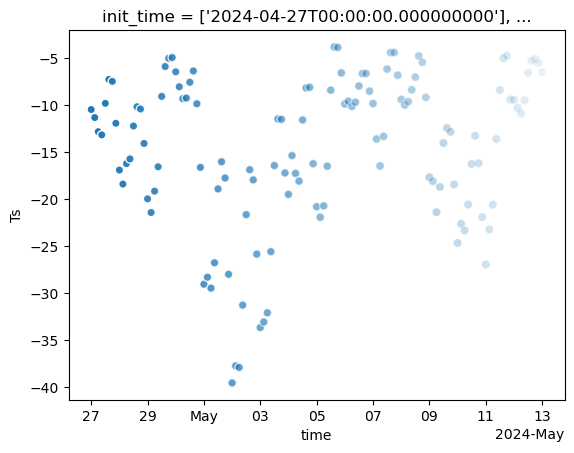

In [64]:
ds.Ts.plot.scatter(x='time', alpha=ds['recency_alpha'])

In [66]:
ds_to_concat = [preproc_GFS(xr.load_dataset(f)) for f in files[:-10]]
bigds = xr.concat(ds_to_concat, dim='init_time')
bigds

<xarray.Dataset> Size: 119kB
Dimensions:        (init_time: 21, time_index: 129)
Coordinates:
  * init_time      (init_time) datetime64[ns] 168B 2024-04-27 ... 2024-05-06
    time           (init_time, time_index) datetime64[ns] 22kB 2024-04-27 ......
    lat            float64 8B 66.49
    lon            float64 8B 313.7
Dimensions without coordinates: time_index
Data variables:
    Ts             (init_time, time_index) float32 11kB -10.45 -11.3 ... -13.46
    Ps             (init_time, time_index) float32 11kB 786.4 786.2 ... 796.5
    ws             (init_time, time_index) float32 11kB 15.51 16.05 ... 4.657
    wd             (init_time, time_index) float32 11kB 130.6 124.3 ... 133.5
    pr             (init_time, time_index) float32 11kB 0.0 0.0 0.0 ... 0.0 0.0
    recency        (init_time, time_index) timedelta64[ns] 22kB 00:00:00 ... ...
    recency_alpha  (init_time, time_index) float64 22kB 1.0 0.993 ... 0.107 0.1
Attributes:
    description:  GFS data for Raven Camp, Greenland

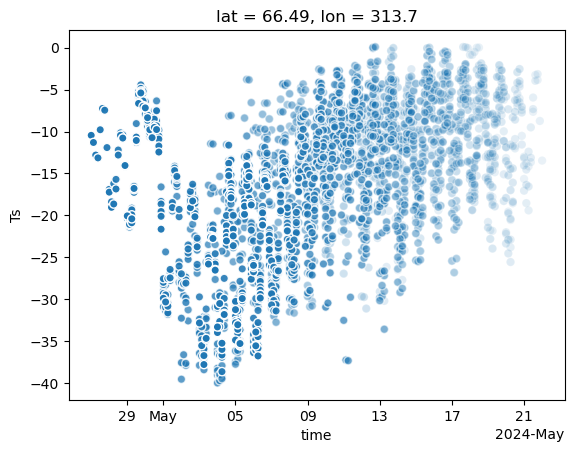

In [69]:
bigds.Ts.plot.scatter(x='time', alpha=bigds['recency_alpha'])

In [ ]:
ds = xr.open_mfdataset(files, combine='nested',concat_dim='init_time')
ds

In [ ]:
#ds['init_time'] =
ds.time.isel(time=0)
#ds.Ts.plot.scatter(x='time')

In [ ]:
ds_list = [xr.open_dataset(f) for f in files_cl61]

for ds in ds_list:
    print('='*50)
    print(ds)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(20,5))

for ds in ds_list:
    ds.time_count.plot.scatter(x='time', ax=ax)
    ax.axvline(ds.time.isel(time=0).values, c='blue', dashes=(5,5))
    ax.axvline(ds.time.isel(time=-1).values, c='orange', dashes=(5,5,2))


plt.show()
plt.clf()